In [442]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils


In [393]:
train_file = pd.read_csv('train_file_clean.csv')

In [394]:
train_file.columns

Index(['Unnamed: 0', 'Tour_ID', 'country', 'age_group', 'travel_with',
       'total_female', 'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category', 'total_packages',
       'total_people', 'total_days', 'continent'],
      dtype='object')

In [395]:
train_file.drop(columns=['Unnamed: 0', 'country'], axis=0, inplace=True)

In [396]:
train_file.set_index('Tour_ID', inplace = True)

In [397]:
train_file['cost_category'].replace({1 : 'Lower Cost', 
                    2 : 'Low Cost', 
                    3 : 'Normal Cost', 
                    4 : 'High Cost', 
                    5 : 'Higher Cost', 
                    6 : 'Highest Cost'}, inplace=True)

In [398]:
train_file['total_female']= train_file['total_female'].dropna() 

In [399]:
train_file['total_male']= train_file['total_male'].dropna() 

In [400]:
train_file = train_file.dropna() 

In [401]:
tf_dummy = pd.get_dummies(train_file, columns = ['age_group', 'travel_with', 'purpose', 
                                             'main_activity', 'info_source', 
                                                 'tour_arrangement', 'continent'])

In [402]:
train_file.drop(columns = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'continent', 'cost_category'], axis = 1, inplace = True)

In [403]:
train_file = pd.concat([train_file, tf_dummy], axis=1)

In [404]:
cols = train_file.columns.tolist()

In [405]:
cols = cols.remove('cost_category')

In [406]:
X = train_file.loc[:, train_file.columns != 'cost_category']


In [407]:
y = train_file['cost_category']

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [409]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(X_train, y_train)

In [410]:
y_pred = model.predict(X_test)

In [411]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.553030303030303

# PCA test

In [412]:
train_file.replace({'Lower Cost' : 1, 
                    'Low Cost' : 2, 
                    'Normal Cost' : 3, 
                    'High Cost' : 4, 
                    'Higher Cost' : 5, 
                    'Highest Cost' : 6}, inplace=True)

In [413]:
scaler = StandardScaler()

In [414]:
train_file = pd.DataFrame(scaler.fit_transform(train_file), columns=train_file.columns)

In [415]:
train_file.shape

(18478, 76)

In [416]:
pca = PCA()

In [417]:
pc_scores = pca.fit_transform(train_file)

In [418]:
PC_NUMBERS = np.arange(1, train_file.shape[1]+1)
PC_LABELS = ['PC'+str(i) for i in np.arange(1,train_file.shape[1]+1)]

In [419]:
loadings = pd.DataFrame(pca.components_, columns=train_file.columns, index=PC_LABELS)

In [420]:
variance_explained = pd.DataFrame(
    {
        'PC': PC_NUMBERS,
        'Proportion': pca.explained_variance_ratio_
    }
)
variance_explained["Cumulative"] = variance_explained.Proportion.cumsum()

In [421]:
train_file.shape

(18478, 76)

Text(0.5, 1.0, 'Scree Plot')

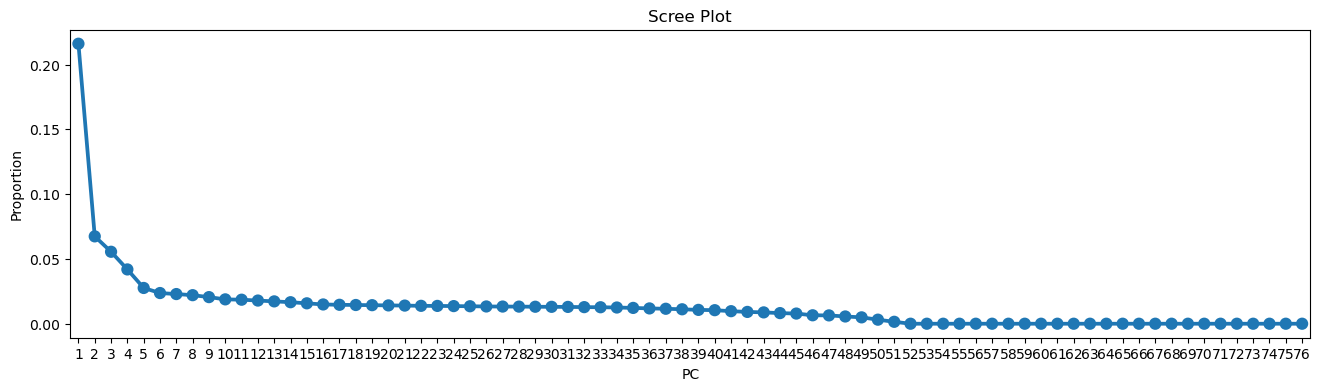

In [422]:
plt.figure(figsize=(16, 4))
sns.pointplot(
    x="PC", y="Proportion",
    data=variance_explained
).set_title('Scree Plot')

In [423]:
pc_scores = pd.DataFrame(pc_scores, columns=PC_LABELS)

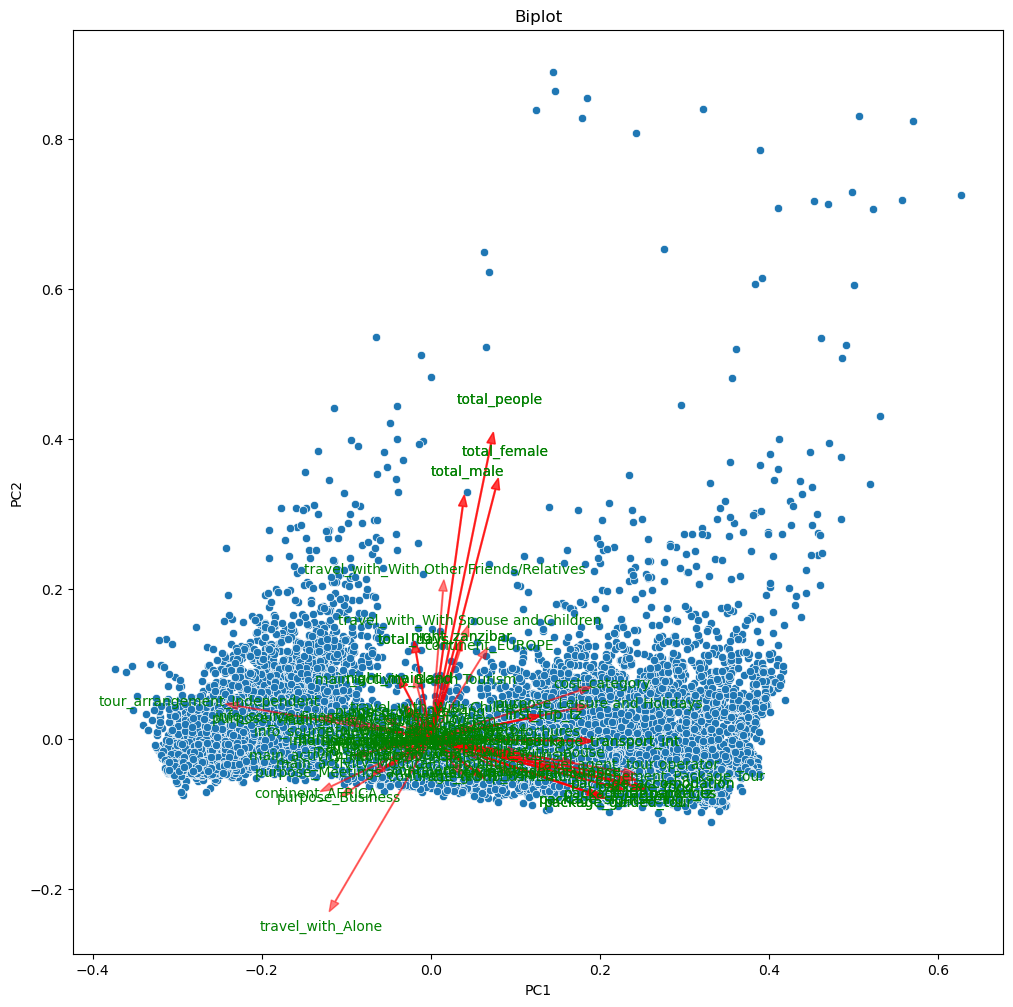

In [424]:
pc_scores_scaled = pc_scores.apply(lambda x: x / (x.max() - x.min()))

plt.figure(figsize=(12, 12))
sns.scatterplot(x=pc_scores_scaled.PC1, y=pc_scores_scaled.PC2).set_title('Biplot')

for i in range(76):
    plt.arrow(0, 0, pca.components_[0,i], pca.components_[1,i], color='r', alpha=0.5, head_width=0.01)
    plt.text(pca.components_[0,i]*1.15, pca.components_[1,i]*1.15, train_file.columns[i], color='g', ha='center', va='center')

In [425]:
train_file

,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,...,tour_arrangement_Independent,tour_arrangement_Package Tour,continent_AFRICA,continent_ASIA,continent_EUROPE,continent_LATIN AMERICA,continent_MIDDLE EAST,continent_NORTH AMERICA,continent_OCEANIA,continent_OTHER
0,-0.814312,0.999438,1.397222,1.031227,1.101092,1.193173,-0.668993,-0.697713,-0.412774,-0.759774,...,-0.995141,0.995141,-0.53877,-0.235891,1.098690,-0.076318,-0.156727,-0.476145,-0.210637,-0.111026
1,0.060658,0.008686,1.397222,1.031227,1.101092,1.193173,-0.668993,-0.697713,-0.412774,-0.759774,...,-0.995141,0.995141,-0.53877,-0.235891,1.098690,-0.076318,-0.156727,-0.476145,-0.210637,-0.111026
2,0.060658,0.008686,1.397222,1.031227,1.101092,1.193173,1.494784,1.433253,-0.412774,-0.249020,...,-0.995141,0.995141,-0.53877,-0.235891,-0.910175,-0.076318,-0.156727,2.100199,-0.210637,-0.111026
3,1.810598,0.008686,-0.715706,-0.969719,-0.908189,-0.838101,-0.668993,-0.697713,-0.412774,-0.504397,...,1.004883,-1.004883,1.85608,-0.235891,-0.910175,-0.076318,-0.156727,-0.476145,-0.210637,-0.111026
4,-0.814312,0.008686,1.397222,1.031227,1.101092,1.193173,-0.668993,1.433253,2.422632,-0.163894,...,-0.995141,0.995141,-0.53877,-0.235891,-0.910175,-0.076318,-0.156727,2.100199,-0.210637,-0.111026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18473,-0.814312,0.008686,-0.715706,-0.969719,-0.908189,-0.838101,-0.668993,-0.697713,-0.412774,-0.504397,...,1.004883,-1.004883,1.85608,-0.235891,-0.910175,-0.076318,-0.156727,-0.476145,-0.210637,-0.111026
18474,0.060658,-0.982066,-0.715706,-0.969719,-0.908189,-0.838101,-0.668993,-0.697713,-0.412774,-0.589523,...,1.004883,-1.004883,1.85608,-0.235891,-0.910175,-0.076318,-0.156727,-0.476145,-0.210637,-0.111026
18475,0.935628,0.008686,-0.715706,-0.969719,-0.908189,-0.838101,-0.668993,-0.697713,-0.412774,0.006357,...,1.004883,-1.004883,-0.53877,-0.235891,-0.910175,-0.076318,-0.156727,2.100199,-0.210637,-0.111026
18476,0.060658,0.008686,1.397222,1.031227,1.101092,1.193173,1.494784,1.433253,-0.412774,0.346860,...,-0.995141,0.995141,-0.53877,-0.235891,-0.910175,-0.076318,-0.156727,2.100199,-0.210637,-0.111026


In [464]:
t = pc_scores.iloc[:, :152]
t

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76
0,1.913944,0.670527,-0.974900,2.484451,2.386636,0.414209,-0.904093,-2.937958,-1.914936,-1.919512,...,9.894267e-17,-8.217696e-18,-6.377404e-16,9.908323e-16,5.835562e-16,3.865127e-16,-7.857985e-17,7.359750e-16,3.293479e-16,-1.362883e-16
1,3.349891,-0.008070,-0.901580,2.647379,-0.342622,-0.105392,0.510038,0.730900,-1.022061,-0.081802,...,-5.776823e-16,1.746019e-16,3.100533e-18,-1.344658e-17,-1.375574e-16,1.884678e-16,1.809596e-16,-3.114819e-16,2.626173e-17,-5.912712e-18
2,5.710990,-1.029791,0.506973,-0.608804,-1.027720,1.777595,-0.704038,1.001138,-0.511299,-0.025224,...,8.750266e-16,1.050595e-15,8.121056e-16,-5.472646e-16,9.952417e-16,-1.487094e-16,-3.621746e-16,-7.635183e-16,8.727656e-16,-5.505519e-18
3,-3.281785,3.053936,-2.668082,0.071612,0.320493,0.400104,-0.095516,0.783999,-0.625211,0.175732,...,-2.409348e-17,-1.832358e-16,-6.262676e-16,6.947654e-17,-2.245458e-16,7.754413e-17,-2.112730e-17,7.923224e-17,-5.896670e-16,-1.097672e-16
4,4.797939,-2.549225,-0.034370,-0.795725,1.037205,0.841276,-0.110305,-0.138627,2.427315,-0.489419,...,-5.975855e-15,-1.236102e-14,-4.942529e-15,-9.968041e-15,-6.598341e-15,-1.153765e-14,1.056765e-14,3.527544e-15,-8.391596e-16,-1.361844e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18473,-5.043314,-1.396886,-1.928718,-1.390795,2.066176,0.255304,0.510125,-1.962270,0.996692,4.468756,...,1.849866e-16,-1.920846e-16,4.478357e-17,-7.323410e-17,3.247792e-16,2.124055e-16,1.018327e-16,-1.059281e-16,-6.538329e-17,-2.310800e-17
18474,-4.553131,-1.592709,-1.816861,-1.338658,0.669879,1.805718,2.268578,-1.156363,1.565065,0.368703,...,4.790459e-17,-3.517563e-16,1.041437e-16,1.870757e-17,1.280211e-16,1.205913e-16,8.909710e-17,9.617683e-17,1.425198e-17,1.023927e-17
18475,-1.537098,2.209994,-0.440072,-0.705740,-2.432859,1.630225,-0.123356,1.327870,0.447541,-0.355266,...,-9.772864e-17,5.839011e-17,-8.815654e-17,2.741522e-16,-4.687114e-16,1.955160e-16,-8.131520e-17,-7.986019e-17,9.782113e-18,-2.387440e-17
18476,4.382786,-0.811450,0.943387,-0.676195,0.646648,-0.688787,1.241141,0.843333,-2.700363,-0.539833,...,3.493969e-16,-2.930981e-16,-3.548397e-16,2.818528e-16,1.562609e-16,2.572893e-17,6.554452e-17,-1.089078e-16,-1.187811e-16,6.818756e-17


In [465]:
X_train, X_test, y_train, y_test = train_test_split(t, y, train_size=0.7, random_state = 42)

In [466]:
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76
5050,-3.511423,2.174079,4.101394,-0.719986,-0.369316,-1.712230,3.067381,2.394861,0.702065,-2.508403,...,-3.604639e-16,-1.252785e-16,-1.603833e-16,-4.054250e-17,2.443905e-16,-1.785884e-17,3.064313e-16,-3.685598e-16,-5.026023e-17,1.901929e-17
17783,7.157857,10.047275,-1.881989,-5.338485,-0.644197,-1.433459,-0.040138,-0.410238,-0.316733,0.872906,...,-3.650284e-18,1.696674e-17,7.330604e-17,2.069427e-16,1.852037e-16,-2.294451e-16,8.767888e-17,-6.503389e-18,-1.745918e-17,-3.119562e-17
8309,5.723085,1.434154,-1.084875,-1.656981,0.393318,0.431714,-1.066320,-0.262902,2.810466,-0.518446,...,1.847153e-16,1.110085e-16,4.778430e-16,-1.415326e-16,-2.238568e-16,5.116021e-16,1.797032e-16,2.382717e-16,-9.680544e-17,-1.309169e-16
18012,-0.992747,1.146611,10.439919,-0.012899,1.211777,-3.537424,3.056279,-1.607577,1.255716,0.296518,...,2.494641e-16,1.671477e-15,-1.621851e-15,-7.927336e-16,4.310735e-16,9.623770e-16,9.479039e-17,-1.643657e-15,-1.771152e-16,2.404310e-17
6679,-4.044887,0.638791,4.574211,0.770496,-0.603234,-1.863511,-0.333557,-1.868639,1.761885,0.518200,...,2.051441e-16,-2.964355e-16,1.881371e-17,-2.948717e-17,1.153660e-16,1.909457e-16,-2.245370e-16,8.366947e-18,-7.035951e-17,9.424813e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.311890,-1.445733,-0.502686,1.432579,-0.369291,-2.751280,1.770352,-0.800432,-1.029069,-1.076135,...,2.495942e-17,6.895048e-17,-1.271909e-16,-1.035319e-16,-6.508647e-17,-7.618522e-17,-1.907909e-16,3.352398e-17,-3.591352e-17,-8.009784e-17
11964,-3.847670,-0.359960,-0.652263,1.521355,0.513829,-0.032674,-0.253392,0.441622,-1.113320,-1.026669,...,2.553412e-16,2.855162e-16,1.166999e-17,-7.804090e-17,-1.588764e-16,-2.535955e-16,-5.621511e-17,1.820859e-16,1.498479e-16,8.027467e-17
5390,4.950276,1.988372,-0.182963,-1.362959,-0.967568,2.019448,0.535846,-0.915261,-0.851004,1.330360,...,-9.262882e-17,-9.196487e-17,2.726603e-16,-2.889166e-16,-1.091098e-16,2.635503e-16,9.261197e-17,1.724272e-16,-8.494150e-17,7.336739e-17
860,3.810471,-2.372460,0.154255,-1.648939,-0.771670,1.359949,0.608929,-0.811025,-0.336958,0.181793,...,3.245041e-16,-1.195158e-16,2.620186e-16,6.839333e-17,1.977455e-16,-4.818008e-17,-2.217677e-16,-1.111169e-16,4.271655e-17,-5.130631e-17


In [467]:
y_train = y_train.astype('int', copy=True)

In [468]:
y_train

Tour_ID
tour_idmwhr7vz1    3
tour_id5mb8tkyj    6
tour_id0f721yy2    5
tour_id7f3193e0    4
tour_idtbdyxim9    3
                  ..
tour_idt2ax9ll7    3
tour_idtq1ylmad    3
tour_idnw903tz9    6
tour_idwfkotx0m    5
tour_id1xi4fq0x    1
Name: cost_category, Length: 12934, dtype: int64

In [469]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

In [470]:
lab = preprocessing.LabelEncoder()
y_test_transformed = lab.fit_transform(y_test)

In [471]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(X_train, y_transformed)

In [472]:
y_pred = model.predict(X_test)

In [473]:
lab = preprocessing.LabelEncoder()
y_pred_transformed = lab.fit_transform(y_pred)

In [474]:
accuracy = accuracy_score(y_test_transformed, y_pred_transformed)
accuracy

0.9998196248196248

In [462]:
y_transformed.shape

(12934,)

In [490]:
proba = model.predict_proba(X_test)

In [484]:
arr = np.asarray(proba)
pd.DataFrame(arr).to_csv('probabilities.csv')  

In [483]:
zindi_submission = proba.to_csv('probabilities.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

AttributeError: 'numpy.ndarray' object has no attribute 'columns'